## With Images as input

### Importing Libraries and Dataset

In [33]:
import numpy as np
import cv2

We can load any haar-cascade XML file using cv2.CascadeClassifier function.

In [34]:
face_detector=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

Uploading images

In [35]:
from google.colab import files
files.upload()

Saving photo_2022-10-25_03-46-47.jpg to photo_2022-10-25_03-46-47.jpg


{'photo_2022-10-25_03-46-47.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\t\x06\x07\x08\x07\x06\t\x08\x07\x08\n\n\t\x0b\r\x16\x0f\r\x0c\x0c\r\x1b\x14\x15\x10\x16 \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-=-157:::#+?D?8C49:7\xff\xdb\x00C\x01\n\n\n\r\x0c\r\x1a\x0f\x0f\x1a7%\x1f%77777777777777777777777777777777777777777777777777\xff\xc2\x00\x11\x08\x05\x00\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa\xa1(\x00\tH\x90\x00\x02@\x00\x00\x00\x04\x88L\x13\x12"@\x04H\x84\xc2\xcc\x00\x00\x13\x00\x00\x00\x00\x00\x00\x00\t"\x00\x03\x8f\xb3\x8a1\xd7>\xbc^y\xd3\x9do\x1c\x1e\x8e\xec\xcc\tW\xe3\xf5\'\xb7\xc7\xb6\xf9W\xb7\x9b\xd8\x9b\xfa;\xd6\xfc5\x04K1\x10YY\x13Y\x96\xca\xd2M0\

In [48]:
img = cv2.imread('photo_2022-10-25_03-46-47.jpg')

### Code for detection

####For face detection

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_detector.detectMultiScale(gray, 1.3, 5)

In [44]:
for (x,y,w,h) in faces:
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]

roi_gray is the cropped detected face in grayscale

roi_color is the cropped detected face in color

#### For eye detection

In [45]:
eyes = eye_detector.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
  cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [46]:
from google.colab.patches import cv2_imshow

### Final Result

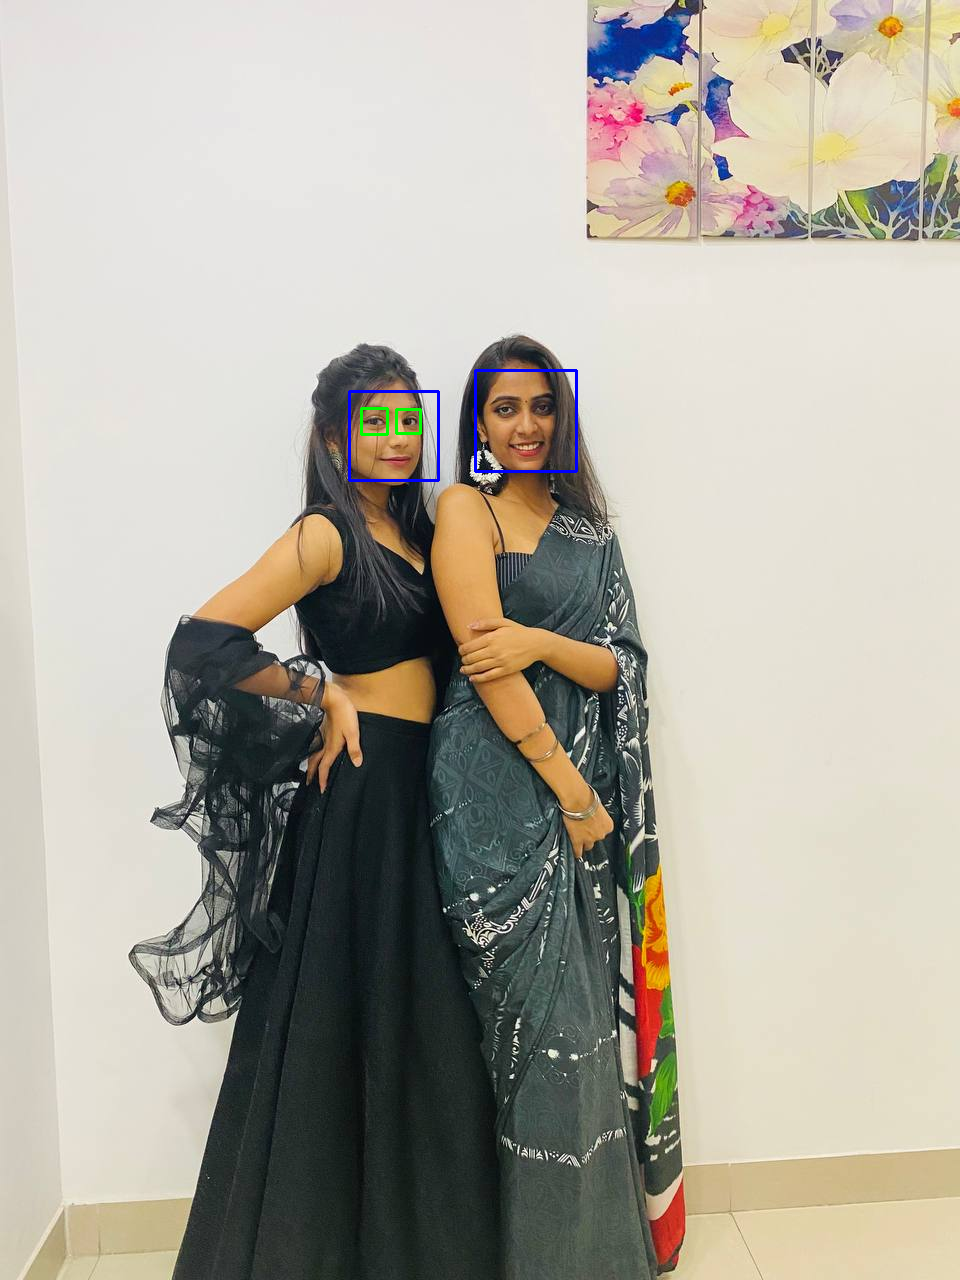

In [47]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()